In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
data1=pd.DataFrame(data)
target = raw_df.values[1::2, 2]
data1["PRICE"]=target
data1.rename(columns={0:"CRIM",1:"ZN",2:"INDUS",3:"CHAS",4:"NOX",5:"RM",6:"AGE",7:"DIS",8:"RAD",9:"TAX",10:"PTRATIO",11:"B",12:"LSTAT"},inplace=True)
raw_df

0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN  
4     17.8  
...    ...  
1007   NaN  
1008  21.0  
1009   NaN  
1010  21.0  
1011   NaN  

[1012 rows x 11 columns]

In [3]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
pd.isnull(raw_df).any()

0     False
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
dtype: bool

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


## Data Visualization

### Histrogram

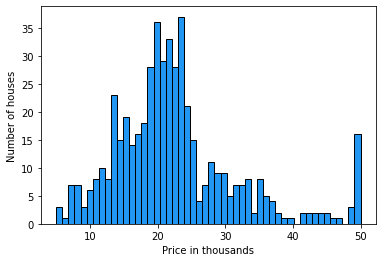

In [6]:
plt.hist(target,ec="black",bins=50,color="#2196F3")
plt.xlabel("Price in thousands")
plt.ylabel("Number of houses")
plt.show()

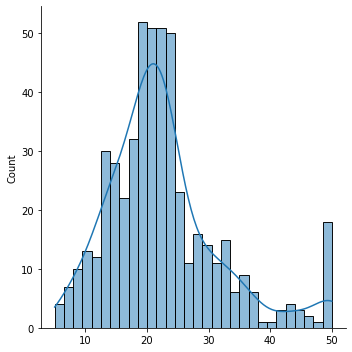

In [7]:
sns.displot(target,kde=True,bins=30)
plt.show()

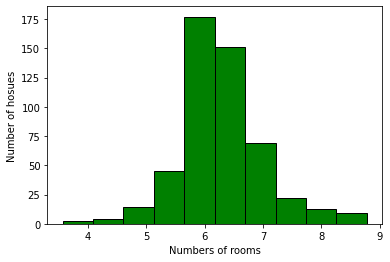

In [8]:
plt.hist(data1["RM"],ec="black",color="green")
plt.xlabel("Numbers of rooms")
plt.ylabel("Number of hosues")
plt.show()

In [9]:
data1["RM"].mean()

6.284634387351779

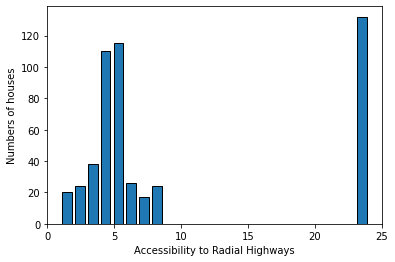

In [10]:
plt.hist(data1["RAD"],ec="black",bins=24,rwidth=0.75)
plt.xlabel("Accessibility to Radial Highways")
plt.ylabel("Numbers of houses")
plt.show()

In [11]:
data1["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

### Barchart

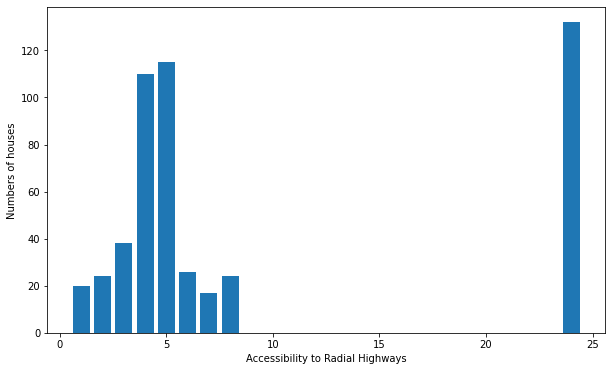

In [12]:
rad_frequency=data1["RAD"].value_counts()
# rad_frequency.index
# rad_frequency.axes[0]
plt.figure(figsize=(10,6))
plt.bar(rad_frequency.index,height=rad_frequency)
plt.xlabel("Accessibility to Radial Highways")
plt.ylabel("Numbers of houses")
plt.show()

In [13]:
near_river=data1["CHAS"].value_counts()
print("total property near river:",near_river[1.0])

total property near river: 35


In [14]:
data1.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
## $$ \rho_{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0$$

In [15]:
data1["PRICE"].corr(data1["RM"])

0.6953599470715389

In [16]:
data1.corr()    # Pearson correlation cofficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [17]:
mask=np.zeros_like(data1.corr())
indices=np.triu_indices_from(mask)
mask[indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

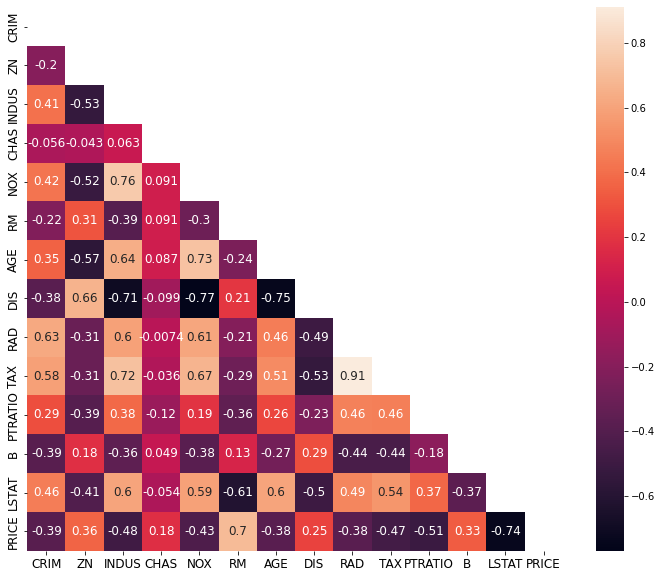

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(data1.corr(),mask=mask,annot=True,annot_kws={"size":12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

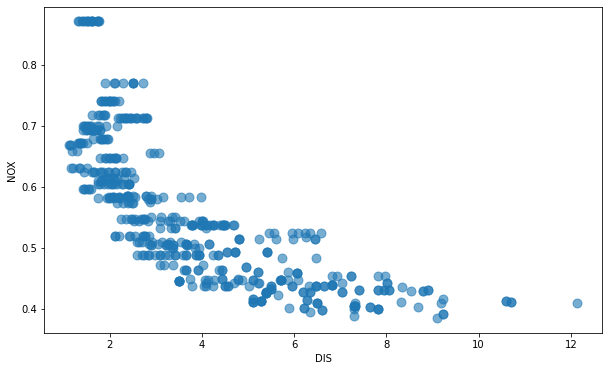

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(data1["DIS"],data1["NOX"],alpha=0.6,s=80)
plt.xlabel("DIS")
plt.ylabel("NOX")
plt.show()

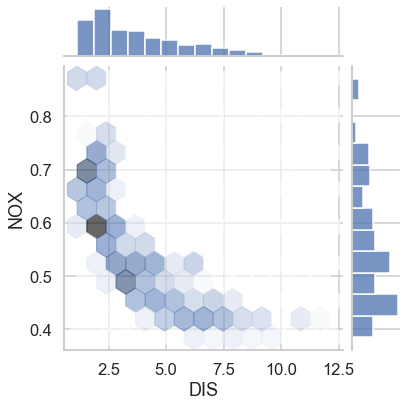

In [20]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data1["DIS"],y=data1["NOX"],joint_kws={"alpha":0.6},kind="hex")
plt.show()

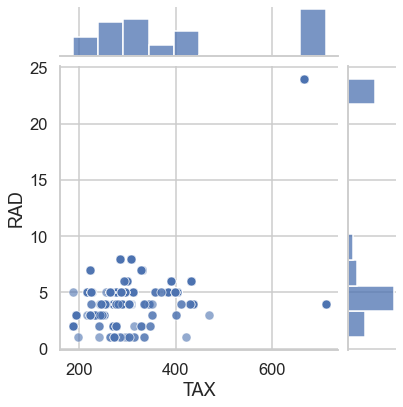

In [21]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data1["TAX"],y=data1["RAD"],joint_kws={"alpha":0.6})
plt.show()

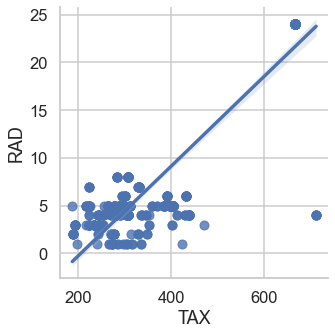

In [22]:
sns.lmplot(x="TAX",y="RAD",data=data1)
plt.show()

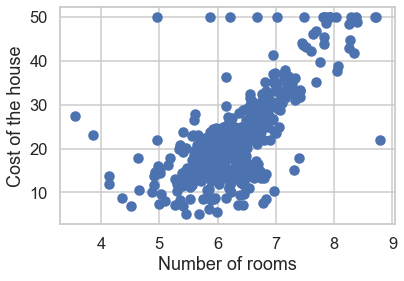

In [23]:
plt.scatter(data1["RM"],data1["PRICE"])
plt.xlabel("Number of rooms")
plt.ylabel("Cost of the house")
plt.show()

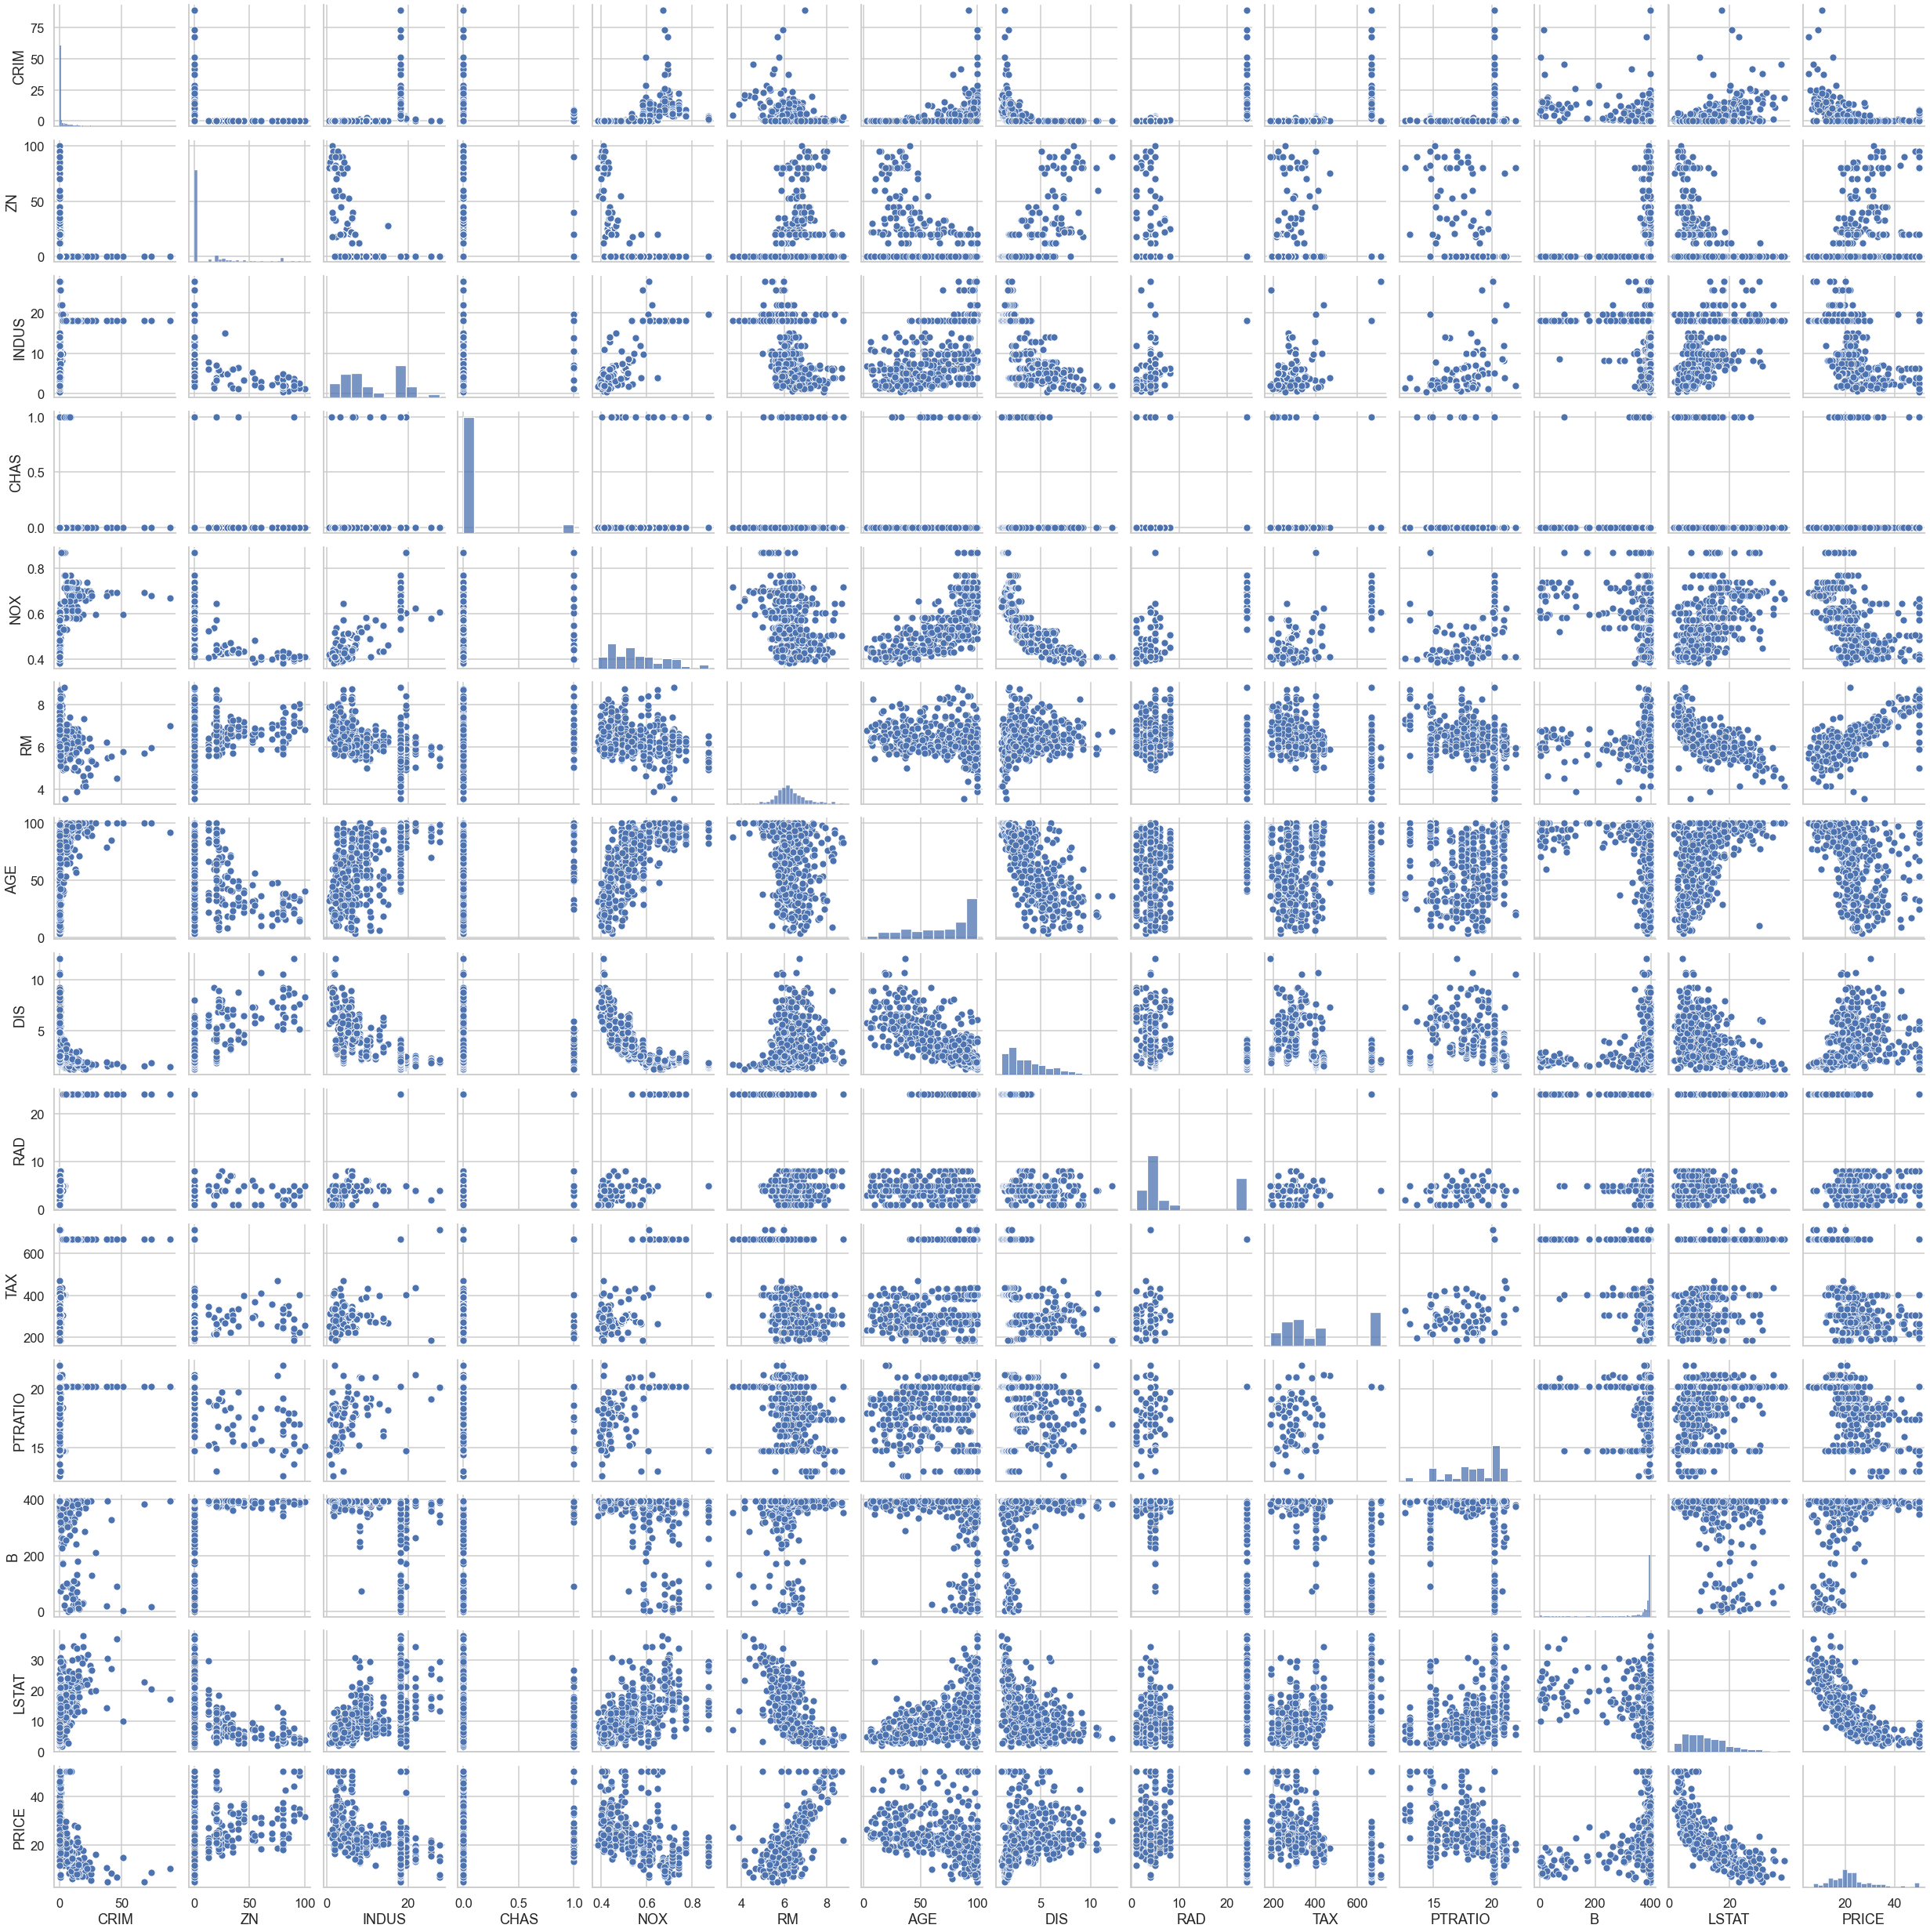

CPU times: total: 33.7 s
Wall time: 35.3 s


In [24]:
%%time
sns.pairplot(data1)
plt.show()

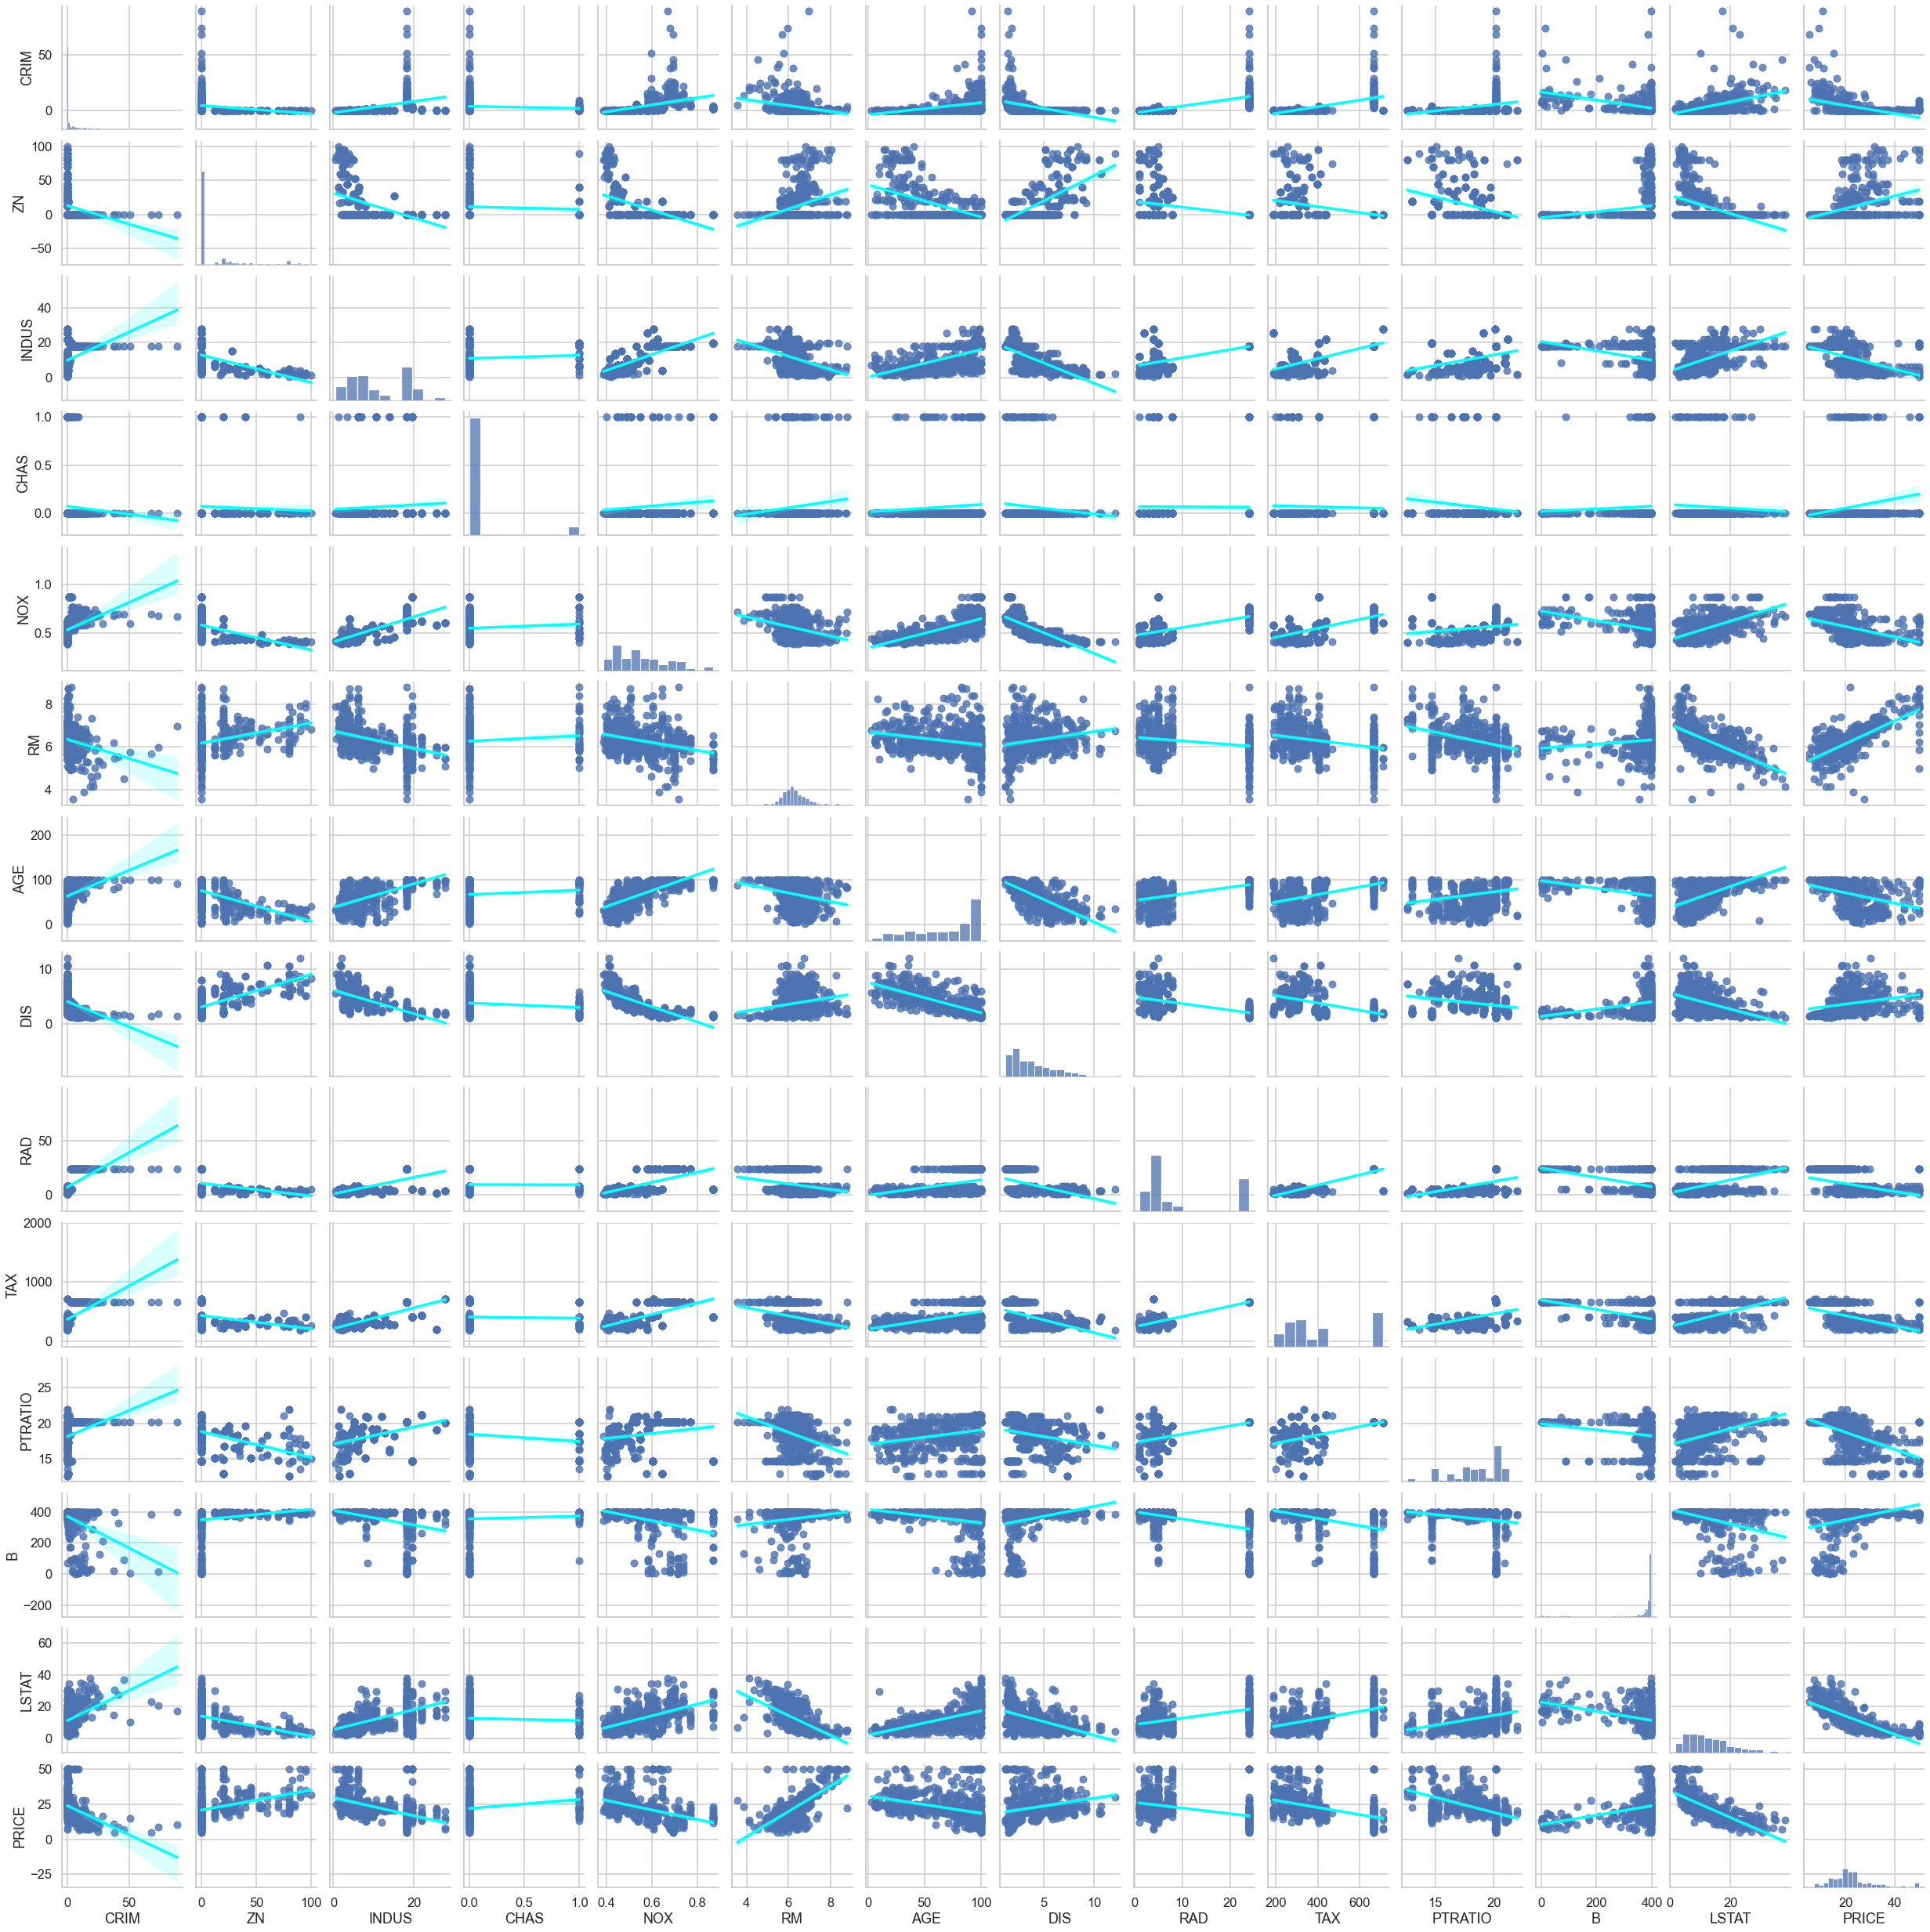

CPU times: total: 53.5 s
Wall time: 56.3 s


In [25]:
%%time
sns.pairplot(data1,kind="reg",plot_kws={"line_kws":{"color":"cyan"}})
plt.show()

## Trainig and testing data split

In [26]:
prices=data1["PRICE"]
features=data1.drop("PRICE",axis=1)
X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

## Multivariable Regression

In [27]:
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Intercept:",reg.intercept_)
pd.DataFrame(data=reg.coef_,index=X_train.columns,columns=["Coef"])

Intercept: 36.533051382824254


Coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [28]:
print("Training data r-squared value:",reg.score(X_train,y_train))
print("Testing data r-squared value:",reg.score(X_test,y_test))

Training data r-squared value: 0.750121534530608
Testing data r-squared value: 0.6709339839115627


## Data Transformation

In [29]:
data1["PRICE"].skew()

1.1080984082549072

In [30]:
y_log=np.log(data1["PRICE"])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [31]:
y_log.skew()

-0.33032129530987864

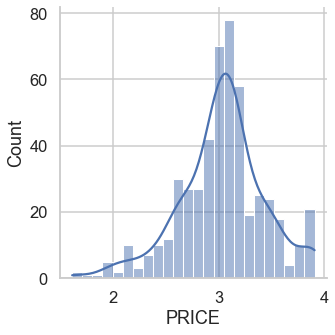

In [32]:
sns.displot(y_log,kde=True)
plt.show()

## Regression using log prices

In [33]:
prices=np.log(data1["PRICE"])
features=data1.drop("PRICE",axis=1)
X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Intercept:",reg.intercept_)
print("Training data r-squared value:",reg.score(X_train,y_train))
print("Testing data r-squared value:",reg.score(X_test,y_test))
pd.DataFrame(data=reg.coef_,index=X_train.columns,columns=["Coef"])  #np.e**reg.coef_

Intercept: 4.059943871775192
Training data r-squared value: 0.7930234826697584
Testing data r-squared value: 0.7446922306260733


Coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

## p Value and Evaluationg Coefficients

In [34]:
X_inc_cons=sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_cons)
result=model.fit()
# result.params
pd.DataFrame({"coef":result.params,"p-value":round(result.pvalues,3)})

coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

## Testing for Multicollinearity
### Variance Inflation Factor (VIF)
$$ TAX=\alpha _0+\alpha _1 RM + \alpha _2 NOX + ... \alpha _{12} LSTAT$$
$$ VIF _{TAX}=\frac{1}{1-R _{TAX} ^2}$$

In [35]:
variance_inflation_factor(X_inc_cons.values,1)

1.714525044393249

In [36]:
X_inc_cons.shape

(404, 14)

In [37]:
vif=[variance_inflation_factor(X_inc_cons.values,i) for i in range(X_inc_cons.shape[1])]
# for i in range(X_inc_cons.shape[1]):
#     print(f"{X_inc_cons.columns[i]} : {variance_inflation_factor(X_inc_cons.values,i)}")
pd.DataFrame({"coef_name":X_inc_cons.columns,"vif":np.around(vif,2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

## Model Simplification & BIC (Baysian Information Criteria)

In [38]:
X_inc_cons=sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_cons)
result=model.fit()
# result.params
org_coef=pd.DataFrame({"coef":result.params,"p-value":round(result.pvalues,3)})
print(f"BIC: {result.bic}\nr-sqaured: {result.rsquared}")

BIC: -139.7499776947892
r-sqaured: 0.7930234826697584


In [39]:
#  Reduced model 1 excluding the INDUS column
X_inc_cons=sm.add_constant(X_train)
X_inc_cons=X_inc_cons.drop(["INDUS"],axis=1)
model=sm.OLS(y_train,X_inc_cons)
result=model.fit()
coef_minus_INDUS=pd.DataFrame({"coef":result.params,"p-value":round(result.pvalues,3)})
print(f"BIC: {result.bic}\nr-sqaured: {result.rsquared}")

BIC: -145.14508855591163
r-sqaured: 0.7927126289415163


In [40]:
#  Reduced model 1 excluding the AGE and INDUS column
X_inc_cons=sm.add_constant(X_train)
X_inc_cons=X_inc_cons.drop(["AGE","INDUS"],axis=1)
model=sm.OLS(y_train,X_inc_cons)
result=model.fit()
reduced_coef=pd.DataFrame({"coef":result.params,"p-value":round(result.pvalues,3)})
print(f"BIC: {result.bic}\nr-sqaured: {result.rsquared}")

BIC: -149.49934294224678
r-sqaured: 0.7918657661852815


In [41]:
frames=[org_coef,coef_minus_INDUS,reduced_coef]
pd.concat(frames,axis=1)

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residual & Residual plots

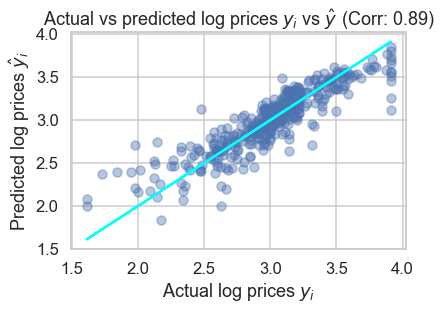

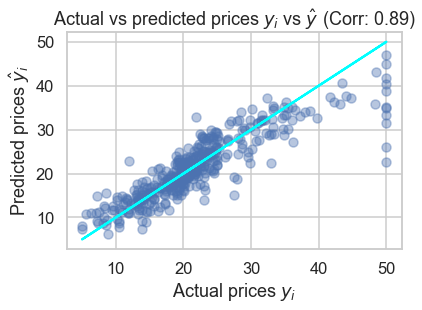

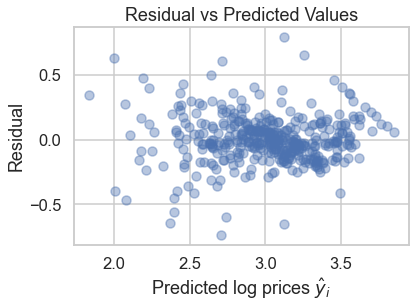

In [42]:
# Modified model
prices=np.log(data1["PRICE"])
features=data1.drop(["PRICE","INDUS","AGE"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)
X_inc_cons=sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_cons)
result=model.fit()
reduced_log_mse=round(result.mse_resid,3)
reduces_log_rsquared=round(result.rsquared,3)
# Residual
# residual=y_train-result.fittedvalues
# result.resid
cor=y_train.corr(result.fittedvalues)
plt.scatter(y_train,result.fittedvalues,alpha=0.4)
plt.plot(y_train,y_train,c="cyan")
plt.xlabel("Actual log prices $y _i$")
plt.ylabel("Predicted log prices $\hat y _i$")
plt.title(f"Actual vs predicted log prices $y _i$ vs $\hat y$ (Corr: {round(cor,2)})")
plt.show()
plt.scatter(np.e**y_train,np.e**result.fittedvalues,alpha=0.4)
plt.plot(np.e**y_train,np.e**y_train,c="cyan")
plt.xlabel("Actual prices $y _i$")
plt.ylabel("Predicted prices $\hat y _i$")
plt.title(f"Actual vs predicted prices $y _i$ vs $\hat y$ (Corr: {round(cor,2)})")
plt.show()
# Residuals vs Predicted values
plt.scatter(result.fittedvalues,result.resid,alpha=0.4)
plt.xlabel("Predicted log prices $\haty _i$")
plt.ylabel("Residual")
plt.title(f"Residual vs Predicted Values")
plt.show()

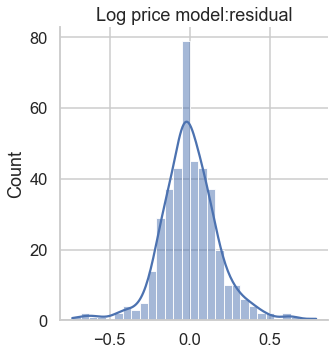

In [43]:
# Distribution of residual
resid_mean=round(result.resid.mean(),3)
resid_skew=round(result.resid.skew(),3)
# resid_skew
sns.displot(result.resid,kde=True)
plt.title("Log price model:residual")
plt.show()

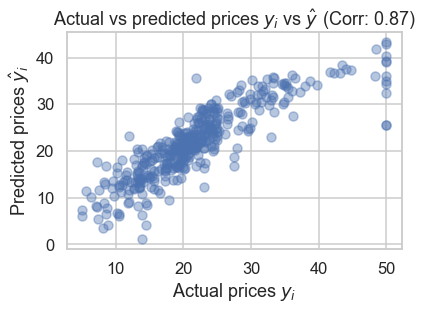

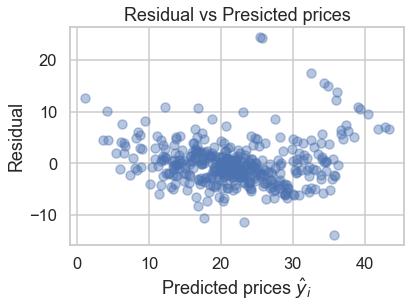

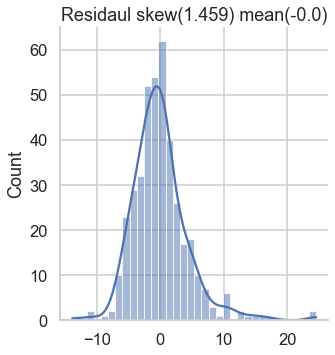

In [44]:
prices=data1["PRICE"]
features=data1.drop(["PRICE"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)
X_inc_cons=sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_cons)
result=model.fit()
cor=y_train.corr(result.fittedvalues)
plt.scatter(y_train,result.fittedvalues,alpha=0.4)
# plt.plot(y_train,y_train,c="cyan")
plt.xlabel("Actual prices $y _i$")
plt.ylabel("Predicted prices $\hat y _i$")
plt.title(f"Actual vs predicted prices $y _i$ vs $\hat y$ (Corr: {round(cor,2)})")
plt.show()
plt.scatter(result.fittedvalues,result.resid,alpha=0.4)
# plt.plot(y_train,y_train,c="cyan")
plt.xlabel("Predicted prices $\haty _i$")
plt.ylabel("Residual")
plt.title(f"Residual vs Presicted prices")
plt.show()
resid_mean=round(result.resid.mean(),3)
resid_skew=round(result.resid.skew(),3)
# resid_skew
sns.displot(result.resid,kde=True)
plt.title(f"Residaul skew({resid_skew}) mean({resid_mean})")
plt.show()
full_mse=round(result.mse_resid,3)
full_rsquared=round(result.rsquared,3)

In [45]:
pd.DataFrame({"R-squared":[reduces_log_rsquared,full_rsquared],"MSE":[reduced_log_mse,full_mse],"RMSE":np.sqrt([reduced_log_mse,full_mse])},index=["Reduced log model","Full Normal Model"])

R-squared     MSE      RMSE
Reduced log model      0.792   0.035  0.187083
Full Normal Model      0.750  19.921  4.463295

In [46]:
# let we have estimated the value 30000 find the upper and lower bound the estimate for 95% we use 2s.d and for 65% 1s.d
upper_bound=np.log(30)+2*np.sqrt(reduced_log_mse)
lower_bound=np.log(30)-2*np.sqrt(reduced_log_mse)
print("Upper bound of the estimate in log is:",upper_bound)
print("Lower bound of the estimate in log is:",lower_bound)
print("Upper bound of the estimate in thousands is:",(np.e**upper_bound)*1000)
print("Lower bound of the estimate in thousands is:",(np.e**lower_bound)*1000)

Upper bound of the estimate in log is: 3.7753631203395495
Lower bound of the estimate in log is: 3.0270316429847615
Upper bound of the estimate in thousands is: 43613.34233239937
Lower bound of the estimate in thousands is: 20635.886906824155
